# Fill in Missing data

* Median
* ARIMA
* Machine Learning

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context("poster")

In [4]:
df = pd.read_hdf('elite_sen_3.h5', 'table')
df.head()

,str_229,disp_204,tmp_265,trf_count,disp_251
timestamp,,,,,
2016-03-01 00:00:00,-685.852734,267.0557,5.310195,NaN,682.785770
2016-03-01 00:00:30,-721.518970,NaN,5.308561,NaN,679.969867
2016-03-01 00:01:00,-686.797993,NaN,5.309214,NaN,682.313533
2016-03-01 00:01:30,-672.410597,NaN,5.309719,NaN,683.238550
2016-03-01 00:02:00,-694.549303,NaN,5.302419,NaN,681.594773


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1667520 entries, 2016-03-01 00:00:00 to 2017-09-30 23:59:30
Freq: 30S
Data columns (total 5 columns):
str_229      910154 non-null float64
disp_204     1315077 non-null float64
tmp_265      910346 non-null float64
trf_count    977584 non-null float64
disp_251     590344 non-null float64
dtypes: float64(5)
memory usage: 76.3 MB


In [7]:
df.dtypes

str_229      float64
disp_204     float64
tmp_265      float64
trf_count    float64
disp_251     float64
dtype: object

In [8]:
df.isnull().sum()

str_229       757366
disp_204      352443
tmp_265       757174
trf_count     689936
disp_251     1077176
dtype: int64

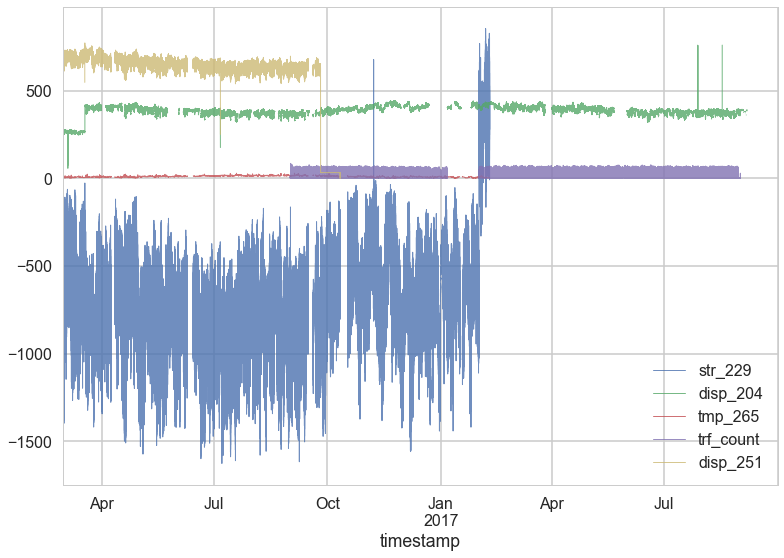

In [11]:
# df.plot(linewidth=1, alpha=0.8)
# plt.plot(df, linewidth=1, alpha=0.8)

Cut data -- 2017-09 to 2017-02

In [21]:
d = df.loc['2016-09-01':'2017-01-01']

Inspect data

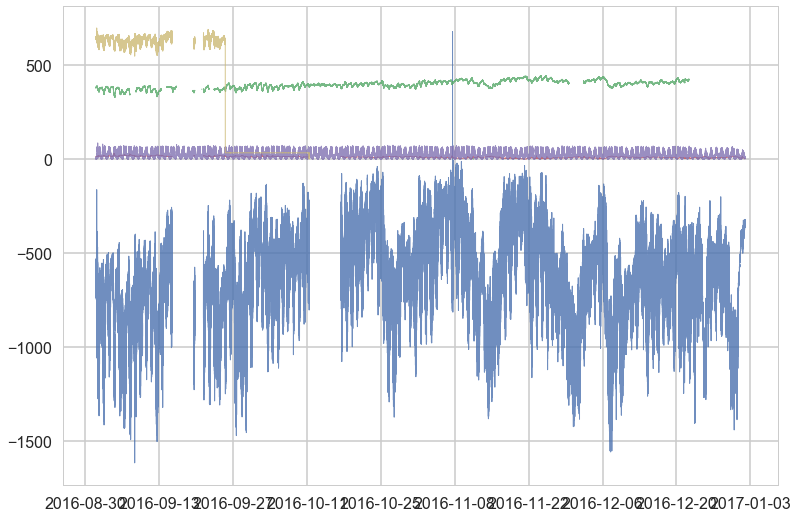

In [22]:
plt.plot(d, linewidth=1, alpha=0.8)

## Tempearture data

In [23]:
len(d)

354240

In [27]:
for col in df.columns:
    print("{} -- amount of data: {}".format(col, len(d[col])))
    print("{} -- amount of missing data: {}".format(col, d[col].isnull().sum()))
    print("{} -- percentage of missing data: {:.2f} %".format(col, d[col].isnull().sum() * 100 / len(d[col])))
    print("")

str_229 -- amount of data: 354240
str_229 -- amount of missing data: 37666
str_229 -- percentage of missing data: 10.63 %

disp_204 -- amount of data: 354240
disp_204 -- amount of missing data: 62750
disp_204 -- percentage of missing data: 17.71 %

tmp_265 -- amount of data: 354240
tmp_265 -- amount of missing data: 37474
tmp_265 -- percentage of missing data: 10.58 %

trf_count -- amount of data: 354240
trf_count -- amount of missing data: 0
trf_count -- percentage of missing data: 0.00 %

disp_251 -- amount of data: 354240
disp_251 -- amount of missing data: 255553
disp_251 -- percentage of missing data: 72.14 %



drop disp_251

In [29]:
d = d.drop('disp_251', axis=1)

In [33]:
d.corr()

,str_229,disp_204,tmp_265,trf_count
str_229,1.000000,0.622371,-0.601196,-0.246682
disp_204,0.622371,1.000000,-0.852954,-0.173756
tmp_265,-0.601196,-0.852954,1.000000,0.175314
trf_count,-0.246682,-0.173756,0.175314,1.000000


## Random Forest

In [ ]:
# try something
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
dfa = d.dropna()
dfa.head()

In [53]:
len(dfa)

268407

In [54]:
dfa.isnull().sum()

str_229      0
disp_204     0
tmp_265      0
trf_count    0
dtype: int64

use MSE and R2 as accuracy metrics

In [50]:
X = dfa.drop('str_229', axis=1) 
y = dfa['str_229']
tree = RandomForestRegressor().fit(X, y)
y_pred = tree.predict(X)

In [110]:
# assess accuracy

def accuracy(y, y_pred):
    print('MSE {:.4f}'.format(mean_squared_error(y, y_pred)))
    print('R2 {:.4f}'.format(r2_score(y, y_pred)))
    plt.plot(y, linewidth=1, alpha=0.7)
    plt.plot(y_pred, linewidth=1, alpha=0.7)

In [58]:
print('MSE {:.4f}'.format(mean_squared_error(y, y_pred)))
print('R2 {:.4f}'.format(r2_score(y, y_pred)))

MSE 3413.8700
R2 0.9368


In [40]:
tree.score(X, y)

0.93717434953688383

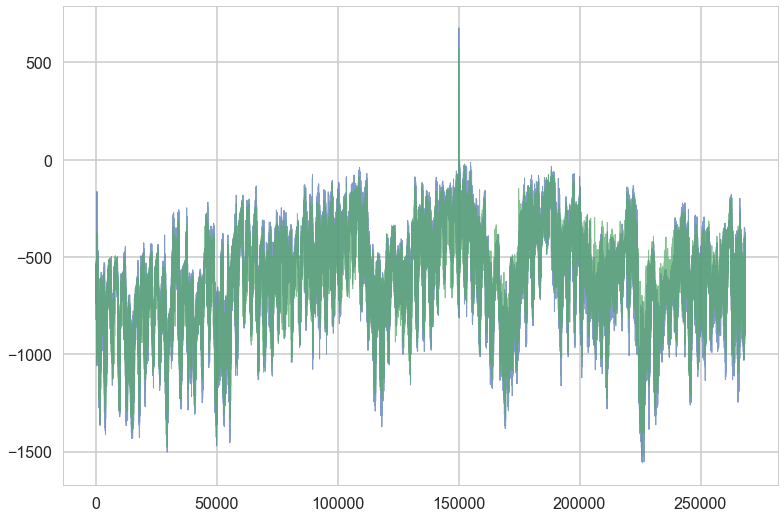

In [64]:
plt.plot(y.values, linewidth=1, alpha=0.7)
plt.plot(y_pred, linewidth=1, alpha=0.7)

In [45]:
X.head()

,disp_204,tmp_265,trf_count
timestamp,,,
2016-09-01 00:00:00,378.286837,13.216164,9.0
2016-09-01 00:00:30,377.893987,13.218530,6.0
2016-09-01 00:01:00,378.350827,13.222001,9.0
2016-09-01 00:01:30,378.779193,13.222051,6.0
2016-09-01 00:02:00,378.758133,13.222019,5.0


Feature sensitivity

In [43]:
tree.feature_importances_

array([ 0.2788436 ,  0.60323227,  0.11792413])

## Linear Regression

MSE 0.0062
R2 0.4292


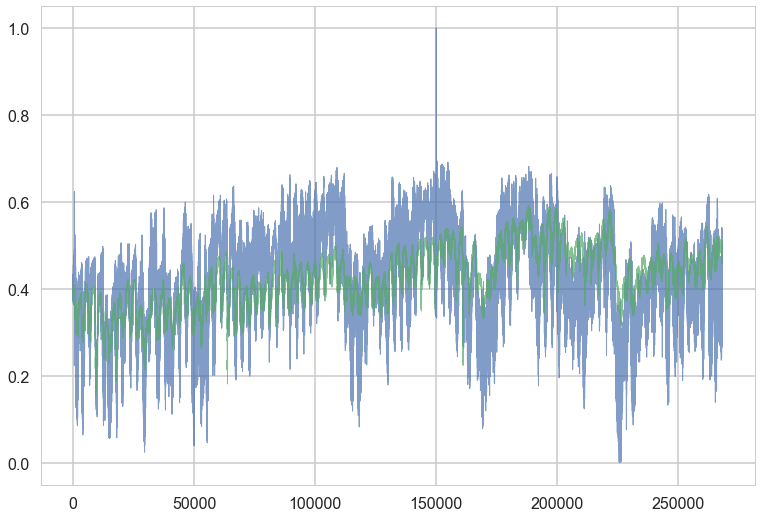

In [88]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(normalize=True).fit(X, y)
y_pred = model_lr.predict(X)

accuracy(y, y_pred)

plt.plot(y.values, linewidth=1, alpha=0.7)
plt.plot(y_pred, linewidth=1, alpha=0.7)

## Lasso

MSE 30823.3729
R2 0.4290


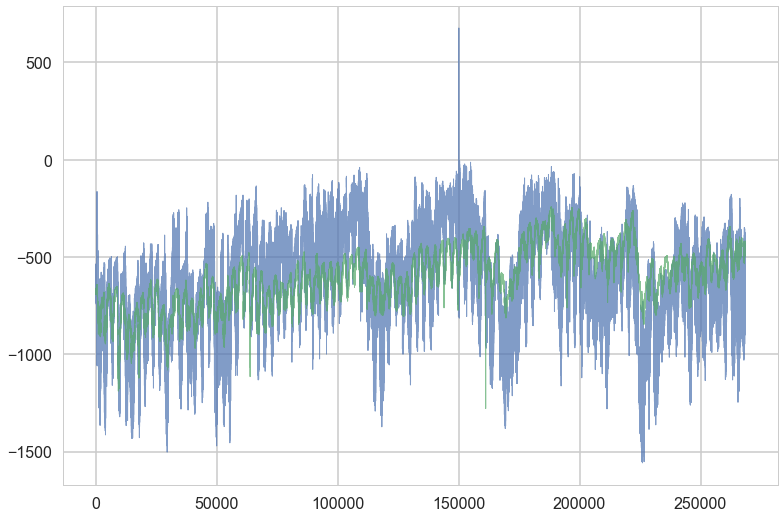

In [73]:
from sklearn.linear_model import Lasso
model_ls = Lasso(alpha=5).fit(X, y)
y_pred = model_ls.predict(X)
accuracy(y, y_pred)
plt.plot(y.values, linewidth=1, alpha=0.7)
plt.plot(y_pred, linewidth=1, alpha=0.7)

## SGDRegressor

very sensitive to feature scalling

In [79]:
d.head()

,str_229,disp_204,tmp_265,trf_count
timestamp,,,,
2016-09-01 00:00:00,-655.256295,378.286837,13.216164,9.0
2016-09-01 00:00:30,-646.963713,377.893987,13.218530,6.0
2016-09-01 00:01:00,-648.266480,378.350827,13.222001,9.0
2016-09-01 00:01:30,-674.427567,378.779193,13.222051,6.0
2016-09-01 00:02:00,-691.203634,378.758133,13.222019,5.0


In [90]:
a = dfa.copy()

In [89]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(a)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3
0,-0.222491,-0.914704,0.829405,-0.888575
1,-0.186800,-0.933994,0.829926,-1.051349
2,-0.192407,-0.911562,0.830689,-0.888575
3,-0.305004,-0.890528,0.830700,-1.051349
4,-0.377209,-0.891562,0.830693,-1.105607


In [97]:
scaled_df.columns = d.columns

In [98]:
X = scaled_df.drop('str_229', axis=1) 
y = scaled_df['str_229']

MSE 0.5710
R2 0.4290


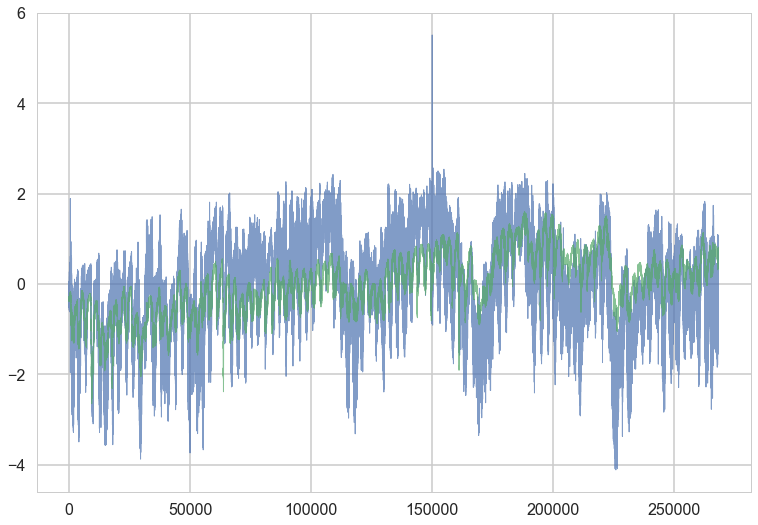

In [100]:
from sklearn.linear_model import SGDRegressor
model_sgdr = SGDRegressor().fit(X.values, y.values)
y_pred = model_sgdr.predict(X.values)
accuracy(y, y_pred)
plt.plot(y.values, linewidth=1, alpha=0.7)
plt.plot(y_pred, linewidth=1, alpha=0.7)

still not gud

https://stackoverflow.com/questions/48087676/random-forest-is-worse-than-linear-regression-it-it-normal-and-what-is-the-reas

if Linear models not performing well, maybe the data is not correlated linearly

## ANN

In [101]:
from sklearn.neural_network import MLPRegressor

note: they are sensitive to feature scaling

In [102]:
scaled_df.head()

,str_229,disp_204,tmp_265,trf_count
0,-0.222491,-0.914704,0.829405,-0.888575
1,-0.186800,-0.933994,0.829926,-1.051349
2,-0.192407,-0.911562,0.830689,-0.888575
3,-0.305004,-0.890528,0.830700,-1.051349
4,-0.377209,-0.891562,0.830693,-1.105607


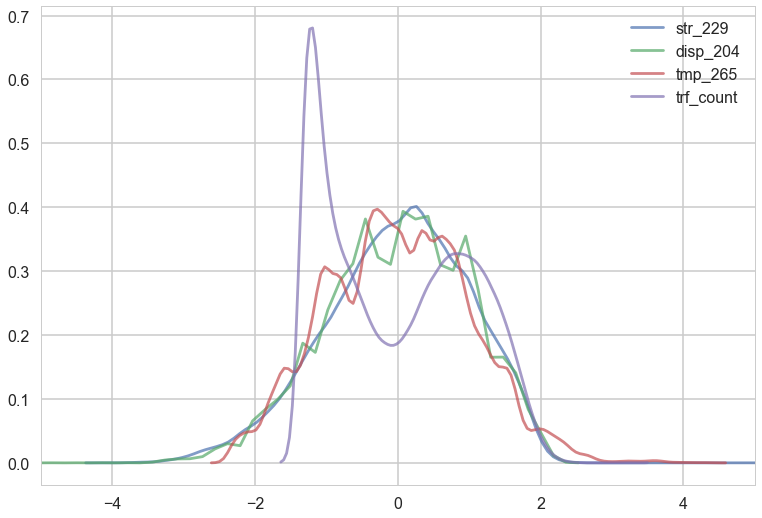

In [107]:
for col in scaled_df.columns:
    sns.kdeplot(scaled_df[col], alpha=0.7)
    plt.xlim((-5, 5))

MSE 0.4421
R2 0.5579


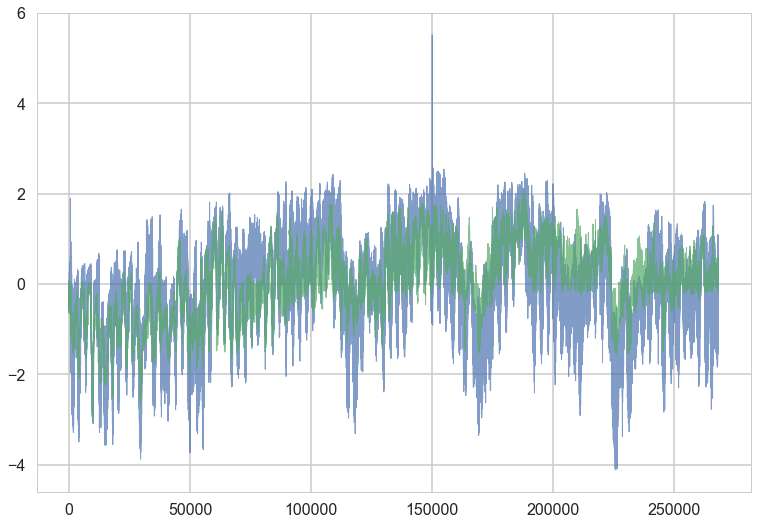

In [108]:
ANN = MLPRegressor().fit(X.values, y.values)
y_pred = ANN.predict(X.values)
accuracy(y, y_pred)
plt.plot(y.values, linewidth=1, alpha=0.7)
plt.plot(y_pred, linewidth=1, alpha=0.7)

Tweak parameters

## Random Forest again

In [109]:
from sklearn.model_selection import train_test_split

split train test manually

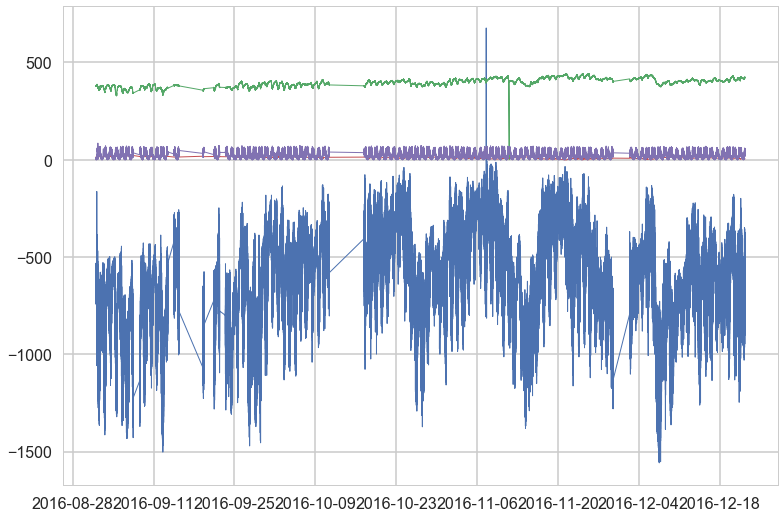

In [127]:
plt.plot(dfa, linewidth=1)

In [128]:
train = dfa.loc[:'2016-11-20']
test = dfa.loc['2016-11-19':'2016-11-20']

X_train = train.drop('str_229', axis=1).values
y_train = train['str_229'].values

X_test = test.drop('str_229', axis=1).values
y_test = test['str_229'].values

In [129]:
len(train), len(test)

(187693, 5760)

MSE 728.3403
R2 0.9404


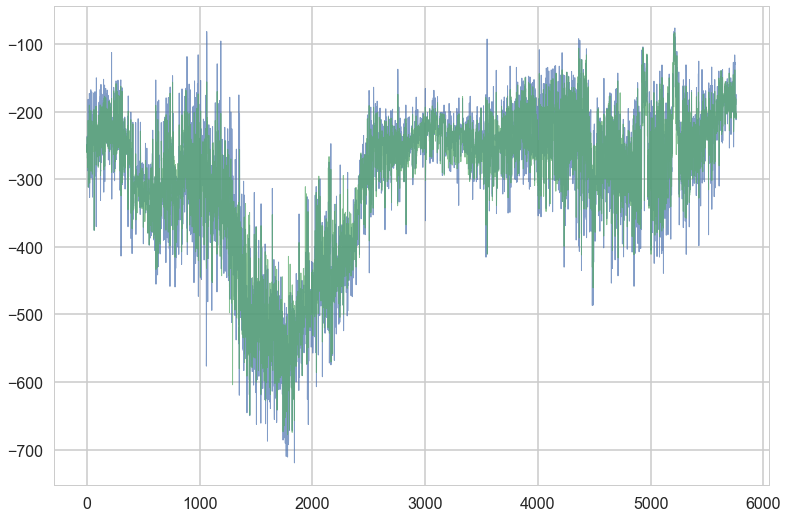

In [130]:
# X = dfa.drop('str_229', axis=1) 
# y = dfa['str_229']

# split data
# X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = RandomForestRegressor().fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy(y_test, y_pred)

MSE 2692.5538
R2 0.9538


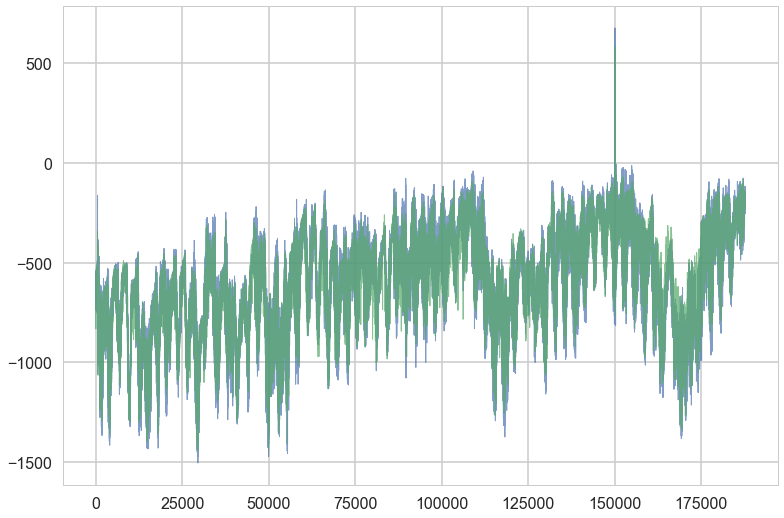

In [131]:
accuracy(y_train, tree.predict(X_train))

In [132]:
# grid search

from sklearn.model_selection import GridSearchCV

In [137]:
tree = RandomForestRegressor()
parameters = {'n_estimators':[2, 4, 8, 12, 24], 'max_depth':[8, 24, None]}
model_tree = GridSearchCV(tree, parameters)
model_tree.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [8, 24, None], 'n_estimators': [2, 4, 8, 12, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [138]:
model_tree.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=4, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [139]:
model_tree.best_score_

0.090218560576816459

wtf? -- timeseries data, cannot do this

MSE 1153.7914
R2 0.9056


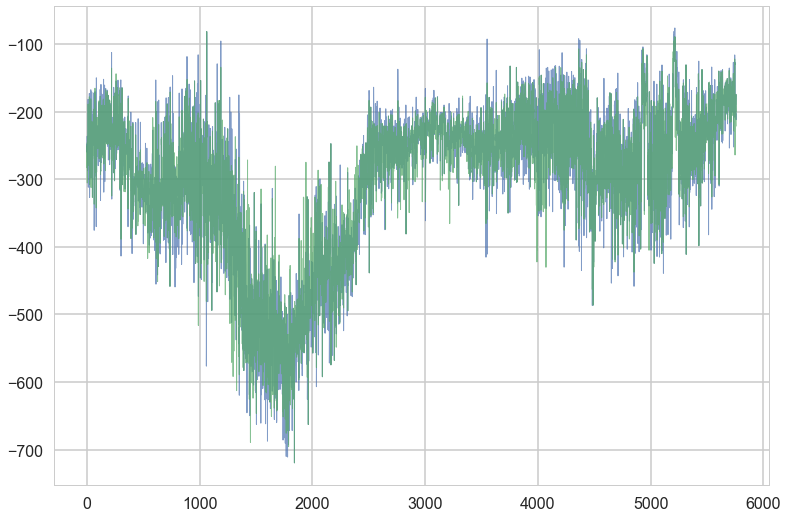

In [146]:
tree = RandomForestRegressor(n_estimators=8, max_depth=None).fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy(y_test, y_pred)

In [147]:
from sklearn.model_selection import cross_val_score

n_estimator: 1 Accuracy: 0.767
n_estimator: 2 Accuracy: 0.861
n_estimator: 4 Accuracy: 0.907
n_estimator: 8 Accuracy: 0.937
n_estimator: 16 Accuracy: 0.949
n_estimator: 24 Accuracy: 0.952
n_estimator: 32 Accuracy: 0.954


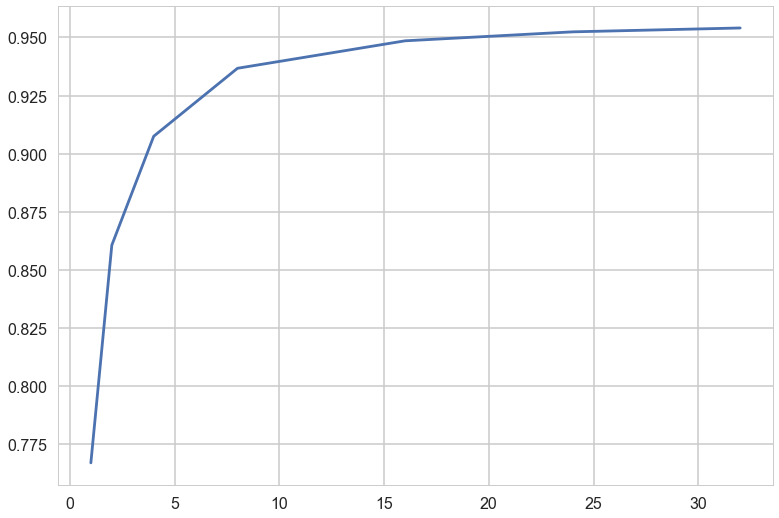

In [153]:
n_estimators = [1, 2, 4, 8, 16, 24, 32]
acc = []

for n in n_estimators:
    tree = RandomForestRegressor(n_estimators=n).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = r2_score(y_test, y_pred)
    print("n_estimator: {} Accuracy: {:.3f}".format(n, score))
    acc.append(score)

plt.plot(n_estimators, acc)

max_features: 1 Accuracy: 0.930
max_features: 2 Accuracy: 0.933
max_features: 3 Accuracy: 0.937


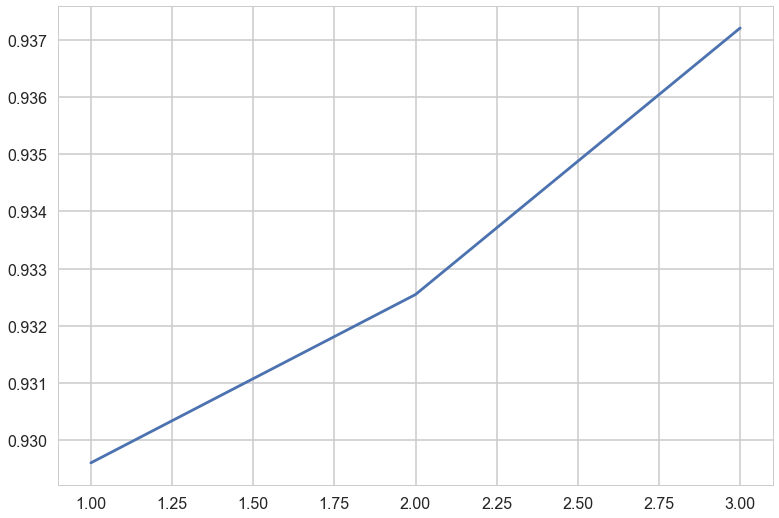

In [157]:
max_features = [1, 2, 3]
acc = []

for m in max_features:
    tree = RandomForestRegressor(n_estimators=8, max_features=m).fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = r2_score(y_test, y_pred)
    print("max_features: {} Accuracy: {:.3f}".format(m, score))
    acc.append(score)

plt.plot(max_features, acc)